In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importar datos:

In [51]:
df = pd.read_csv("incident_event_log.csv")


Análisis exploratorio problema 1 y 3:

In [75]:
#Revisar los que creo que no tienen ningun tipo de impacto:

df_no_impacto = df[["incident_state","opened_at","sys_created_by","sys_created_at","contact_type","location","category","subcategory",
                   "assignment_group","assigned_to","vendor","caused_by","made_sla"]]
df_no_impacto = pd.get_dummies(df_no_impacto, columns=["incident_state","opened_at","sys_created_by","sys_created_at","contact_type","location","category","subcategory",
                   "assignment_group","assigned_to","vendor","caused_by"], drop_first=False)
df_no_impacto.corrwith(df_no_impacto["made_sla"])

made_sla                            1.000000
incident_state_-100                 0.001567
incident_state_Active               0.159890
incident_state_Awaiting Evidence    0.004319
incident_state_Awaiting Problem     0.014563
                                      ...   
vendor_code 8s                      0.006556
caused_by_?                         0.003380
caused_by_CHG0000097               -0.000925
caused_by_CHG0000132               -0.002219
caused_by_CHG0001327               -0.003252
Length: 32465, dtype: float64

En primera instancia, se eliminan de la base de datos aquellos datos que son utilizados únicamente para enumerar o codificar el problema ya que para cada uno de los incidentes será diferente y su función es únicamente identidicar el conflicto pero no esta relacionado con la actividad de la compañia como tal. De igual manera, se eliminan aquellos relacionados con que el conflicto se soluciona ya que estamos buscando aquellas variables relacionadas con que se supero el tiempo de espera límite, es de esperar que con esto el cliente se retire de la linea. 
Así mismo, se se tienen aquellas con textos largos relacionados con descripciones, pues estos dependen plenamente de cada uno de los incidentes y son bastante especificos, es bastante dificil encontrar comentarios extactamente iguales repetidos por lo que analisar estas no será valioso.
Después de esto, se analisa el coeficiente de correlación de aquellos que parece no tener relación con el problema, estos muestran coeficientes de correlación bastante bajos por lo que se considera que pueden no tener ningun tipo de relación con la problematica elegida.

In [ ]:
#Cambiar categoricas por variables dummies:
df_problemas_1y3 = df
df_problemas_1y3 = pd.get_dummies(df_problemas_1y3, columns=["notify","location"], drop_first=False)
df_problemas_1y3["impact"] = df_problemas_1y3["impact"].str[0].astype(int)
df_problemas_1y3["urgency"] = df_problemas_1y3["urgency"].str[0].astype(int)
df_problemas_1y3["priority"] = df_problemas_1y3["priority"].str[0].astype(int)
df_problemas_1y3.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,location_Location 90,location_Location 91,location_Location 92,location_Location 93,location_Location 94,location_Location 95,location_Location 96,location_Location 97,location_Location 98,location_Location 99
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,False,False,False,False,False,False,False,False
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,False,False,False,False,False,False,False,False
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,False,False,False,False,False,False,False,False
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,False,False,False,False,False,False,False,False,False
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,False,False,False,False,False,False,False,False,False


En el data frame con las variables de interés las que son categoricas se convierten en dummies para poder realizar un análisis adecuado, pues si a cada una se le otorga un valor de maner arbitraria se puede dañar el análisis. De igual manera, la de impacto, urgencia y priporidad se toman los ínidices numéricos para realizar un análisi adecuado. Debido a que son 100 ubicaciones se agrupan por las 10 más relevantes y el resto en otras para tener una visualización de más fácil comprensión de los datos. 

In [67]:
#Sacar un data frame que contenga unicamente las variables de nuestro interés:
df_problemas_1y3 = df_problemas_1y3.drop(["number","incident_state","caller_id","opened_by","opened_at","sys_created_by",
                                          "sys_created_at","sys_updated_by","sys_updated_at","contact_type","category",
                                          "subcategory","u_symptom","cmdb_ci","assignment_group","assigned_to","knowledge",
                                          "u_priority_confirmation","problem_id","rfc","vendor","caused_by","closed_code",
                                          "resolved_by","resolved_at","closed_at"], axis=1)

df_problemas_1y3.head

#Correlación con made_sla

df_problemas_1y3.corrwith(df_problemas_1y3["made_sla"])

active                  0.565501
reassignment_count     -0.089037
reopen_count           -0.015880
sys_mod_count          -0.241942
made_sla                1.000000
                          ...   
location_Location 95    0.001401
location_Location 96   -0.001177
location_Location 97    0.004090
location_Location 98    0.002215
location_Location 99   -0.001529
Length: 235, dtype: float64

La correlación muestra que todos parecen estar correlacionadas con made_sla menos las ubicaciones que presentan coeficientes bastante bajos, por lo que se procede a realizar analisis gráficos con estas variables exceptuando las ubicaciones. 

In [68]:
df_problemas_1y3 = df_problemas_1y3.drop(df_problemas_1y3.filter(like="location").columns, axis=1)
df_problemas_1y3.corrwith(df_problemas_1y3["made_sla"])

active                  0.565501
reassignment_count     -0.089037
reopen_count           -0.015880
sys_mod_count          -0.241942
made_sla                1.000000
impact                  0.041607
urgency                 0.047101
priority                0.050001
notify_Do Not Notify    0.024959
notify_Send Email      -0.024959
dtype: float64

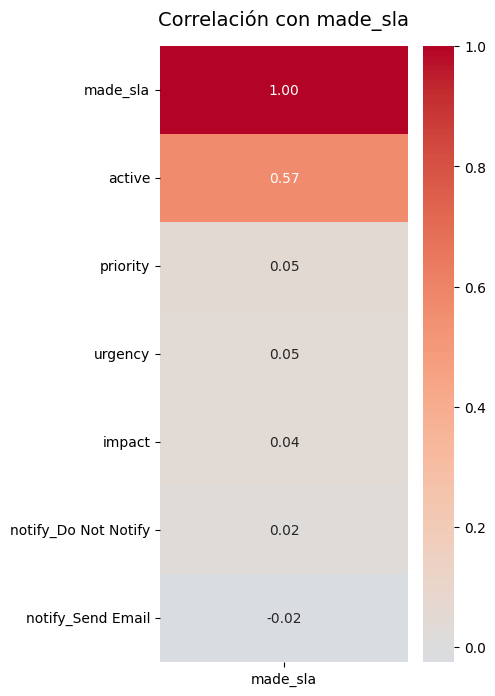

In [80]:
#Grafica para comparar con las variables categoricas:
df3 = df_problemas_1y3.drop(["reassignment_count","reopen_count","sys_mod_count"],axis= 1)

# Graficar mapa de calor:

corr = df3.corr()["made_sla"].sort_values(ascending=False)

plt.figure(figsize=(4,8))
sns.heatmap(
    corr.to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.title("Correlación con made_sla", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()


Para las variables categoricas se genera un mapa de calor que muestra aquellas con mayor correlación, se puede evidenciar que la que tiene una correlación psotitiva más fuerte y puede llegar a tener mayor impacto en la variable de interés es active, que indica si esta abierto o cerrado el registro, seguido por la prioridad y urgencia. Así mismo, esta muestra que la única con una correlación negativa es la notify_Send Email. 

Text(0.5, 1.0, 'Relación made_sla y reassignment_count')

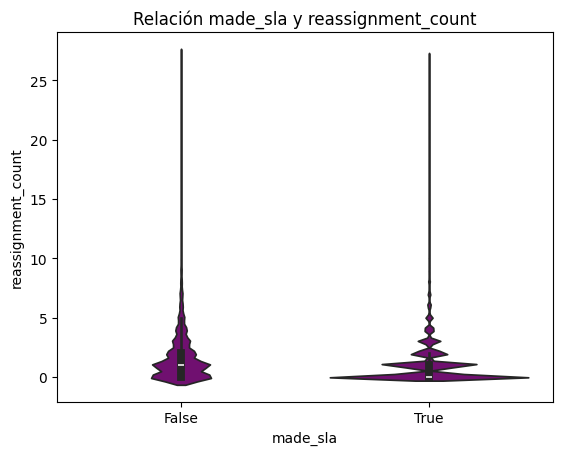

In [81]:
#Gráfica categoricas vs. continuas

sns.violinplot(data=df, x=df["made_sla"], y=df["reassignment_count"], color= "purple")
plt.title("Relación made_sla y reassignment_count")


Este diagrama nos muestra que el número de veces que el incidente cambio de analista si influye en elcumplimiento del agreement level, pues cuando este se cumple se ve que en promedio se reasigno una menor cantidad de veces en promedio que en aquellas que no se cumple. 

Text(0.5, 1.0, 'Relación made_sla y reopen_count')

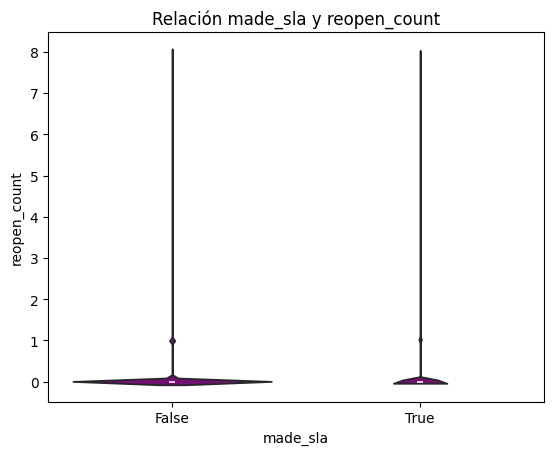

In [83]:
sns.violinplot(data=df, x=df["made_sla"], y=df["reopen_count"], color="purple")
plt.title("Relación made_sla y reopen_count")

Este diagrama muestra como la cantidad de reaperturas realizadas estan más relacionadas con el incumplimento del agreement level, pues a pesar de que el numero de estas es bastante bajo su gran mayoria se concentran en el violín asociado al incumplimiento. 

Text(0.5, 1.0, 'Relación made_sla y sys_mod_count')

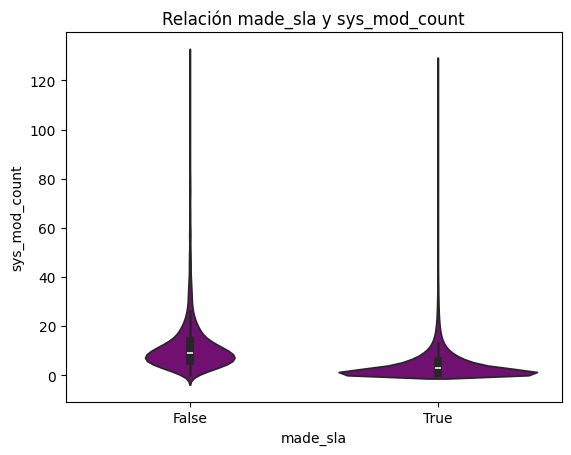

In [84]:
sns.violinplot(data=df, x=df["made_sla"], y=df["sys_mod_count"], color="purple")
plt.title("Relación made_sla y sys_mod_count")

En este tambien es evidente como la media de actualizaciones realizadas para auqellos casos de incumplimento es más alta que para lo que se cumple, esto nos indica que los incidentes que tienen un mayor numero de actualizacione tabién tienen una tendencia a incumplir con el SLA

Análisis exploratorio para el problema 2:

In [16]:
#Generar un df que contenga unicamente los datos a comparar
df_nuevo = df[["location", "impact"]]
df_problema2 = pd.get_dummies(df_nuevo, columns=["location","impact"], drop_first=False)
df_problema2

,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,location_Location 106,location_Location 107,location_Location 108,location_Location 109,...,location_Location 93,location_Location 94,location_Location 95,location_Location 96,location_Location 97,location_Location 98,location_Location 99,impact_1 - High,impact_2 - Medium,impact_3 - Low
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Primero se crea un data frame que contiene unicamente impacto y location, las variables que serán análizadas 

In [19]:
#Contar la cantidad de datos que hay por ubicación:

cantidad = df_problema2.sum()
cantidad

location_?                   76
location_Location 10         13
location_Location 100         6
location_Location 101         4
location_Location 102         5
                          ...  
location_Location 98         10
location_Location 99        129
impact_1 - High            3491
impact_2 - Medium        134335
impact_3 - Low             3886
Length: 228, dtype: int64

Se crea una matriz de correlaciones entre las ubiaciones y el impacto para asegurarnos que estas esten relacionadas de alguna manera y el analisis valga la pena

In [25]:
#Matriz de varianzas y covarianzas:
matriz_correlaciones = df_problema2.corr()
matriz_correlaciones

,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,location_Location 106,location_Location 107,location_Location 108,location_Location 109,...,location_Location 93,location_Location 94,location_Location 95,location_Location 96,location_Location 97,location_Location 98,location_Location 99,impact_1 - High,impact_2 - Medium,impact_3 - Low
location_?,1.000000,-0.000222,-0.000151,-0.000123,-0.000138,-0.000185,-0.000107,-0.000672,-0.007244,-0.000394,...,-0.006902,-0.000123,-0.000123,-0.002143,-0.001538,-0.000195,-0.000699,0.006150,-0.011037,0.009175
location_Location 10,-0.000222,1.000000,-0.000062,-0.000051,-0.000057,-0.000076,-0.000044,-0.000278,-0.002995,-0.000163,...,-0.002854,-0.000051,-0.000051,-0.000886,-0.000636,-0.000080,-0.000289,-0.001522,-0.007706,0.011927
location_Location 100,-0.000151,-0.000062,1.000000,-0.000035,-0.000039,-0.000052,-0.000030,-0.000189,-0.002035,-0.000111,...,-0.001939,-0.000035,-0.000035,-0.000602,-0.000432,-0.000055,-0.000196,-0.001034,-0.008239,0.012189
location_Location 101,-0.000123,-0.000051,-0.000035,1.000000,-0.000032,-0.000042,-0.000024,-0.000154,-0.001661,-0.000090,...,-0.001583,-0.000028,-0.000028,-0.000492,-0.000353,-0.000045,-0.000160,-0.000844,0.001245,-0.000892
location_Location 102,-0.000138,-0.000057,-0.000039,-0.000032,1.000000,-0.000047,-0.000027,-0.000172,-0.001857,-0.000101,...,-0.001770,-0.000032,-0.000032,-0.000550,-0.000394,-0.000050,-0.000179,-0.000944,0.001392,-0.000997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Location 98,-0.000195,-0.000080,-0.000055,-0.000045,-0.000050,-0.000067,-0.000039,-0.000244,-0.002627,-0.000143,...,-0.002503,-0.000045,-0.000045,-0.000777,-0.000558,1.000000,-0.000254,-0.001335,0.001969,-0.001411
location_Location 99,-0.000699,-0.000289,-0.000196,-0.000160,-0.000179,-0.000241,-0.000139,-0.000875,-0.009439,-0.000514,...,-0.008993,-0.000160,-0.000160,-0.002793,-0.002004,-0.000254,1.000000,-0.004797,0.007074,-0.005068
impact_1 - High,0.006150,-0.001522,-0.001034,-0.000844,-0.000944,-0.001267,-0.000731,0.009537,-0.018852,-0.002704,...,-0.014577,-0.000844,-0.000844,0.007624,-0.005731,-0.001335,-0.004797,1.000000,-0.678176,-0.026685
impact_2 - Medium,-0.011037,-0.007706,-0.008239,0.001245,0.001392,0.001868,0.001078,-0.003077,0.021981,0.003987,...,0.009340,0.001245,0.001245,-0.012249,0.009312,0.001969,0.007074,-0.678176,1.000000,-0.716540


Para anlizar esto de manera más sencilla se deja en las filas las ubiaciones y en las columnas el impacto

In [26]:
#Ordenar correlación 

matriz_correlaciones = matriz_correlaciones.drop(
    [col for col in matriz_correlaciones.columns if "impact" in col],
    axis=0 
)
matriz_correlaciones = matriz_correlaciones.drop(
    [col for col in matriz_correlaciones.columns if "location" in col],
    axis=1  
)
matriz_correlaciones



,impact_1 - High,impact_2 - Medium,impact_3 - Low
location_?,0.006150,-0.011037,0.009175
location_Location 10,-0.001522,-0.007706,0.011927
location_Location 100,-0.001034,-0.008239,0.012189
location_Location 101,-0.000844,0.001245,-0.000892
location_Location 102,-0.000944,0.001392,-0.000997
...,...,...,...
location_Location 95,-0.000844,0.001245,-0.000892
location_Location 96,0.007624,-0.012249,0.009425
location_Location 97,-0.005731,0.009312,-0.007227
location_Location 98,-0.001335,0.001969,-0.001411


Como resultado obtenemos correlaciones diferentes a cero, implicando que existe cierta relacion entre el impacto y la ubicación donde se da en incidente

In [27]:
#sacar las ubiaciones de mayor correlación con cada tipo de impacto:

matriz_high = matriz_correlaciones["impact_1 - High"]
top5_high_postivo = matriz_high.nlargest(5)
top5_high_negativo = matriz_high.nsmallest(5)

matriz_medium = matriz_correlaciones["impact_2 - Medium"]
top5_medium_positivo = matriz_medium.nlargest(5)
top5_medium_negativo = matriz_medium.nsmallest(5)

matriz_low = matriz_correlaciones["impact_3 - Low"]
top5_low_positivo = matriz_low.nlargest(5)
top5_low_negativo = matriz_low.nsmallest(5)

print("Las ubicaciones de mayor correlacion con los incidentes de impacto high son: ",top5_high_postivo,top5_high_negativo,
      "Las ubicaciones de mayor correlacion con los incidentes de impacto medium son: ",top5_medium_positivo,top5_medium_negativo,
      "Las ubicaciones de mayor correlacion con los incidentes de impacto low son: ",top5_low_positivo,top5_low_negativo )

Las ubicaciones de mayor correlacion con los incidentes de impacto high son:  location_Location 17     0.061710
location_Location 116    0.057905
location_Location 41     0.055072
location_Location 76     0.047507
location_Location 22     0.040944
Name: impact_1 - High, dtype: float64 location_Location 108   -0.018852
location_Location 93    -0.014577
location_Location 111   -0.012198
location_Location 46    -0.011105
location_Location 39    -0.009672
Name: impact_1 - High, dtype: float64 Las ubicaciones de mayor correlacion con los incidentes de impacto medium son:  location_Location 108    0.021981
location_Location 46     0.017021
location_Location 161    0.013945
location_Location 82     0.012608
location_Location 43     0.012086
Name: impact_2 - Medium, dtype: float64 location_Location 188   -0.085005
location_Location 246   -0.048097
location_Location 118   -0.043610
location_Location 17    -0.041389
location_Location 116   -0.039270
Name: impact_2 - Medium, dtype: float64 Las ub

Se sacan las correlaciones más fuertes negaticas y positivas para cada uno de los impactos para realizar mapas de calor que nos premitan visualizar esto de manera  más sencilla

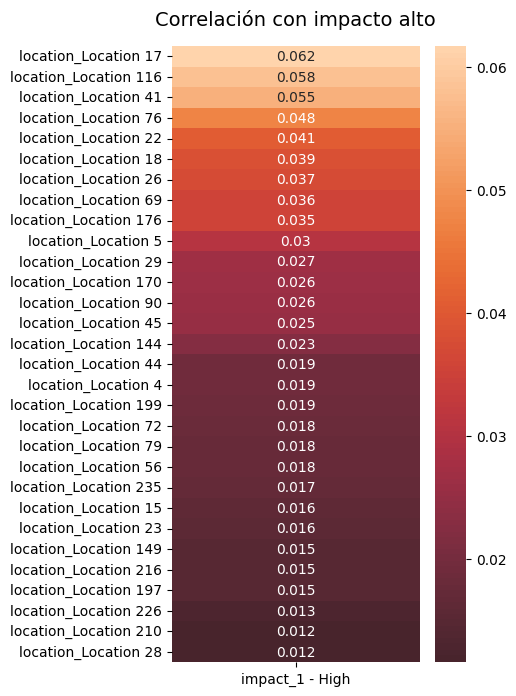

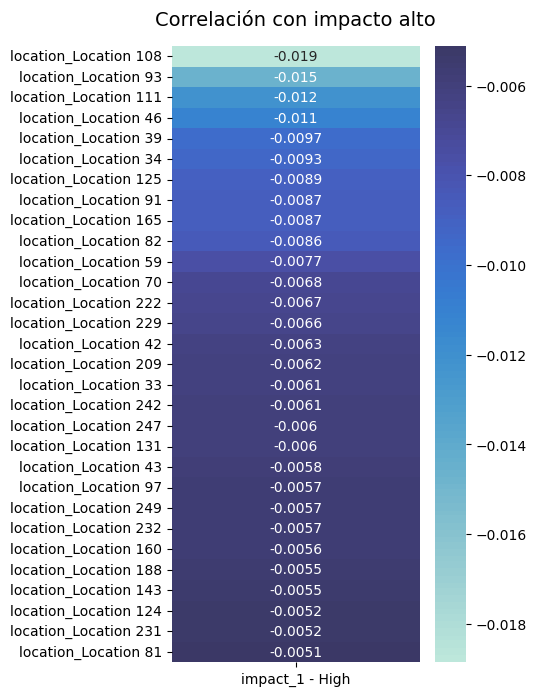

In [85]:
#Mapa de calor

top30_High= matriz_high.nlargest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_High,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto alto", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

top30_High= matriz_high.nsmallest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_High,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto alto", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

Estos mapas de calor nos muestran que existe una relación tanto positiva como negativa entre las diferentes ubicaciones y los incidentes de impacto alto

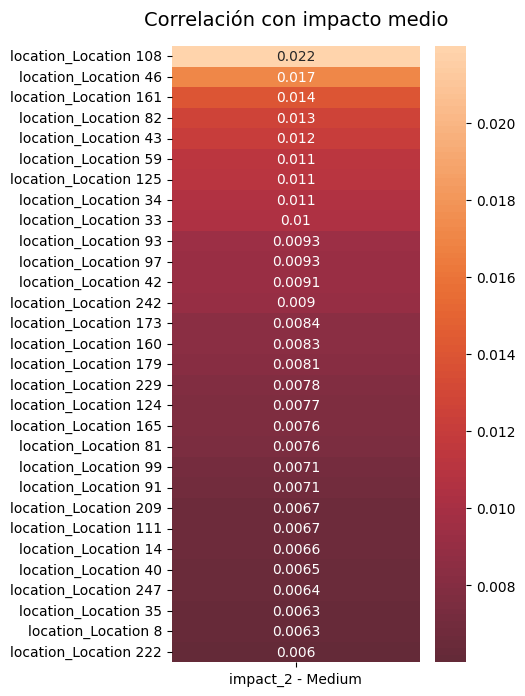

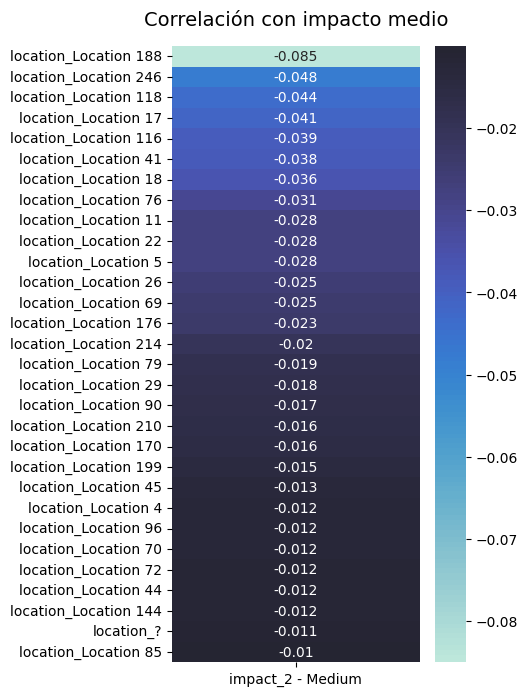

In [86]:
#Mapa de calor

top30_medium= matriz_medium.nlargest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_medium,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto medio", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

top30_medium= matriz_medium.nsmallest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_medium,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto medio", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

Estos mapas de calor nos muestran que existe una relación tanto positiva como negativa entre las diferentes ubicaciones y los incidentes de impacto medio

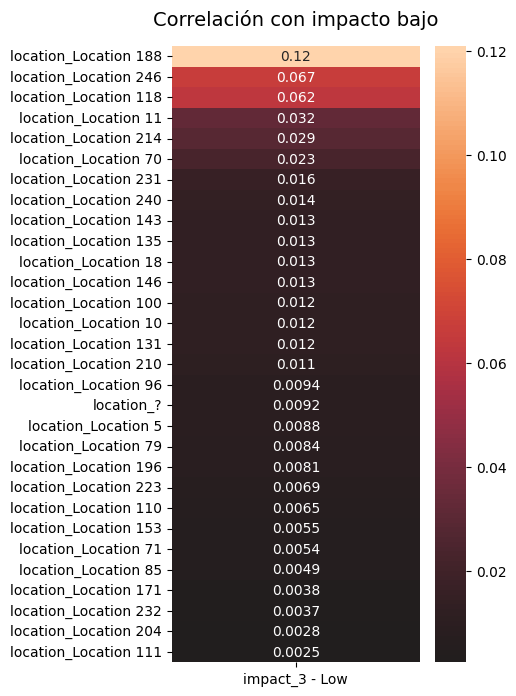

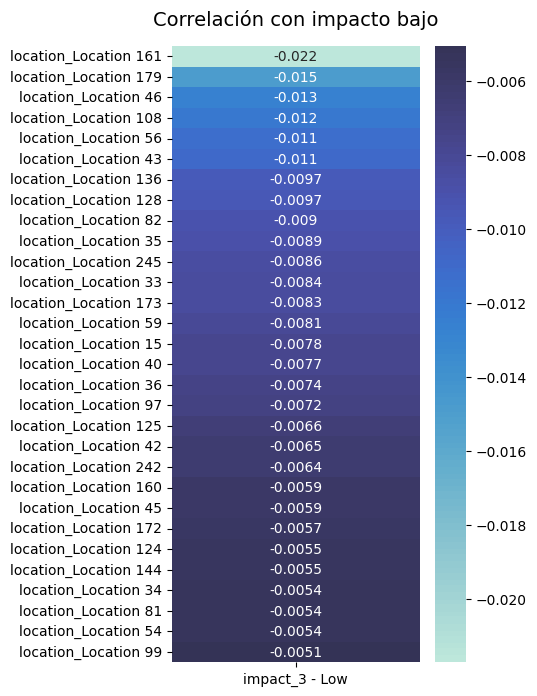

In [87]:
#Mapa de calor

top30_low= matriz_low.nlargest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_low,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto bajo", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

top30_low= matriz_low.nsmallest(30).to_frame()

plt.figure(figsize=(4,8))
sns.heatmap(
    top30_low,
    annot=True,
    center=0,
    cbar=True
)
plt.title("Correlación con impacto bajo", fontsize=14, pad=15)
plt.yticks(rotation=0)
plt.show()

Estos mapas de calor nos muestran que existe una relación tanto positiva como negativa entre las diferentes ubicaciones y los incidentes de impacto bajo